# PHASE 2 PROJECT
## GROUP MEMBERS
1. SHARON KALIKU
2. PAUL KAMAU
3. KIPKOSGEI KIPTUI
4. EZRA KIPCHIRCHIR
5. HERI KIMOTHO
## BUSINESS STAKEHOLDER
 The real estate agency 

## BUSINESS PROBLEM 
A real estate agency wants to analyze the factors that influence the prices of houses in order to provide accurate pricing estimates to their clients. The agency aims to understand the relationship between various features of a house, such as the number of rooms, living area, basement area, overall quality, and other relevant factors, and how they affect the sale price.

The clients being, homeowners and potential house buyers have difficulty in making informed decisions regarding property investments, to make this decision, understanding the factors influencing housing prices in a specific area is necessary.
## OBJECTIVES
REAL ESTATE AGENCY
- To identify the locations with the highest sales prices.
- To identify how seasonal trends affect sales.
- To predict prices of houses depending on the features.



Importing the necessary libraries that will be used to perform analysis on our data 

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('kc_house_data.csv')
areas = pd.read_csv('deliverylocations.csv')

Defining functions to load and view the data

In [58]:
# loading data

def desription_data(data):
    data = pd.read_csv(data)
    print("\n.............Info:.................")
    print(data.info())
    print("\n.............Describe:...............")
    print(data.describe())
    print("\n.............Head:.................")
    print(data.head())

In [59]:
desription_data('kc_house_data.csv')


.............Info:.................
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat          

## Null values
Looking at the information above we can see only three columns have missing values, that is; "waterfront", "view" and "yr_renovated". Every house has its own unique features and not all are the same. Some houses contain certain features while others lack them. Since this is real world data, we can account for missing values in "waterfront" and "view" columns by saying not all houses are build the same and those lacking the two features have caused our data on the two columns to be inconsitent with the rest of the other columns. The "yr_renovated" column can also be accounted for by saying not all houses undergo renovation. Houses build earlier might need renovation but recent houses do not require renovation hence the missing values in the column
 

In [5]:
# Using mode to impute missing values
# Python function to impute missing values

def replace_missing_with_mode(data, column_name):
    mode_value = data[column_name].mode().iloc[0]  
    data[column_name].fillna(mode_value, inplace =True)

In [6]:
# columns to be imputed
replace_missing_with_mode(data,'view')
replace_missing_with_mode(data, 'waterfront')

In [81]:
# Changing our date from object to datetime data type
data['date'] = pd.to_datetime(data['date'])

After checking for null values, we check for any duplicated values in the data.

In [9]:
# Checking for duplicated values in our data
data.duplicated().sum()

0

In [10]:
# drop the rows in sqft_basement with a '?'
data= data.drop(data[data.sqft_basement == '?'].index)


Creating a new column 'Grade_1' that stores our new 'grade' column  after getting rid of the string 'grade' and converting it to a numeric datatype  

In [60]:
data["Grade_1"] = data["grade"].str.split().apply(lambda x: x[0])
# Convert the Grade1 column to an integer.
data["Grade_1"] = pd.to_numeric(data["Grade_1"])

### Converting the categorical columns to numerical data types

We are converting the following categorical data "Waterfront", "View" and  "grade" into numerical data  types.

In [61]:

data['view_1'] = data['view'].replace({'NONE': 0,'FAIR':1,'AVERAGE': 2,'GOOD':3, 'EXCELLENT':4})
data['waterfront_1'] = data['waterfront'].replace({'YES': 0, 'NO':1})
data['condition1'] = data['condition'].replace({'Poor': 0, 'Fair':1,'Average':2,'Good':3,'Very Good':4})


Since we have already replaced the strings in our categorical data with numeric values we can drop the original columns 

In [62]:
data.drop(columns = ['waterfront', 'view', 'grade','condition', ], inplace= True)

In [14]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
Grade_1                   int64
view_1                    int64
waterfront_1              int64
condition1                int64
dtype: object

 Delivery locations (zip codes) data 

In [63]:
# Create a new dataframe with two columns for zip codes and cities
new_areas = pd.DataFrame(columns=['Zip Code', 'City'])

# Iterate over the original dataframe and extract zip codes and cities
for i in range(len(areas.columns)):
    # Skip the columns that are not zip codes
    if i % 2 != 0:
        continue
    # Extract the zip codes and cities from each pair of columns
    zip_codes = areas.iloc[:, i]
    cities = areas.iloc[:, i + 1]
    # Append the zip codes and cities to the new dataframe
    new_areas = new_areas.append(pd.DataFrame({'Zip Code': zip_codes, 'City': cities}), ignore_index=True)

# Print the new dataframe
print(new_areas)

    Zip Code         City
0      98001       Algona
1      98001       Auburn
2      98001  Federal Way
3      98002       Auburn
4      98003  Federal Way
..       ...          ...
447      NaN          NaN
448      NaN          NaN
449      NaN          NaN
450      NaN          NaN
451      NaN          NaN

[452 rows x 2 columns]


In [64]:
new_areas.isnull().sum()
new_areas.dropna()

,Zip Code,City
0,98001,Algona
1,98001,Auburn
2,98001,Federal Way
3,98002,Auburn
4,98003,Federal Way
...,...,...
404,98593,Vader
405,98595,Westport
406,98596,Chehalis
407,98596,Winlock


In [66]:
#renaming to match our first data set
new_areas = new_areas.rename(columns={"Zip Code": "zipcode"})
new_areas

,zipcode,City
0,98001,Algona
1,98001,Auburn
2,98001,Federal Way
3,98002,Auburn
4,98003,Federal Way
...,...,...
447,NaN,NaN
448,NaN,NaN
449,NaN,NaN
450,NaN,NaN


In [67]:
#merging our data sets
new_areas['zipcode'] = new_areas['zipcode'].astype(str)
data['zipcode'] = new_areas['zipcode'].astype(str)


merged_data = pd.merge(new_areas, data , on='zipcode') 
merged_data

,zipcode,City,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Grade_1,view_1,waterfront_1,condition1
0,98001,Algona,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,...,1955,0.0,47.5112,-122.257,1340,5650,7,0.0,NaN,2
1,98001,Algona,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,...,1951,1991.0,47.7210,-122.319,1690,7639,7,0.0,1.0,2
2,98001,Algona,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,...,1933,NaN,47.7379,-122.233,2720,8062,6,0.0,1.0,2
3,98001,Auburn,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,...,1955,0.0,47.5112,-122.257,1340,5650,7,0.0,NaN,2
4,98001,Auburn,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,...,1951,1991.0,47.7210,-122.319,1690,7639,7,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,nan,NaN,1049010390,3/19/2015,505000.0,3,2.00,1260,5460,1.0,...,1972,0.0,47.7355,-122.180,1510,5460,7,0.0,1.0,2
2406,nan,NaN,7905370390,10/9/2014,475000.0,5,2.50,2340,7200,1.0,...,1975,0.0,47.7206,-122.211,1930,7221,7,0.0,1.0,2
2407,nan,NaN,4140090240,11/5/2014,520000.0,3,2.25,2590,9263,1.0,...,1977,0.0,47.7691,-122.262,2580,9450,8,0.0,1.0,4
2408,nan,NaN,4055700030,5/2/2015,1450000.0,3,4.50,3970,24920,2.0,...,1977,NaN,47.7183,-122.258,2610,13838,10,2.0,1.0,2


In [70]:
merged_data.isnull().sum()
#dropping the rows with null values
new_data = merged_data.dropna()

# Data visualization
Now we have checked for abnormalities in the data, we can go ahead and plot the data to explore the distribution, relationships and patterns in the data. This will also help us in identifying outliers and trends.
 

In [15]:
# Importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [16]:
y = data["price"]
X = data.drop("price", axis = 1)

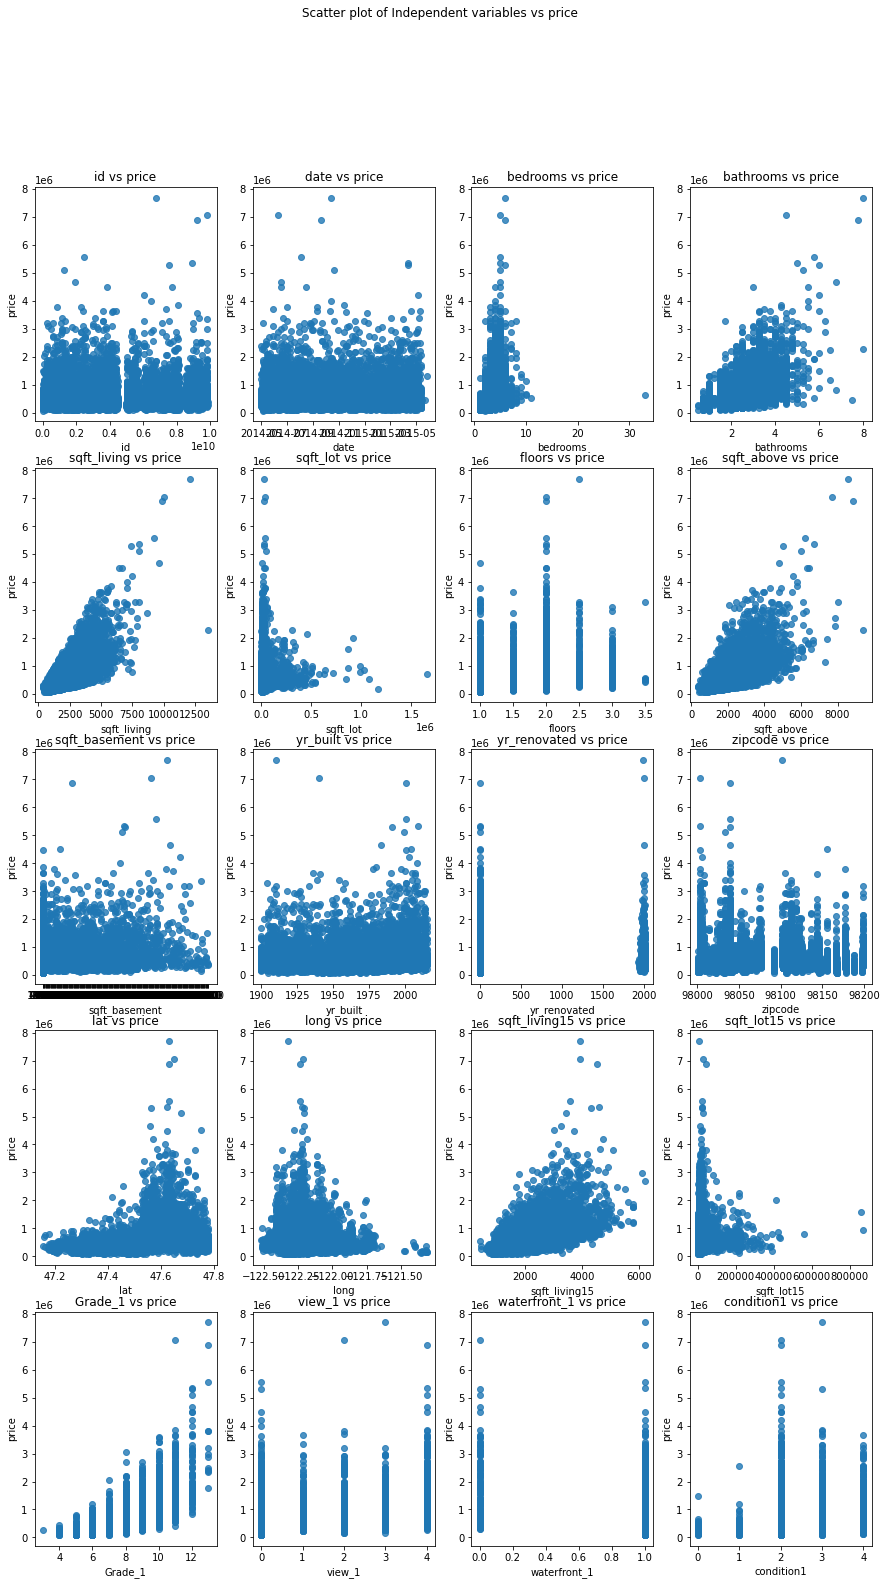

In [17]:
def scatter_plots(y, X):
    plots = X.shape[1]
    cols = 4
    rows = (plots + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    fig.suptitle(f"Scatter plot of Independent variables vs {y.name}")

    for i, ax in enumerate(axes.flat):
        if i < plots:
            x_col_name = X.columns[i]
            ax.scatter(X.iloc[:, i], y, alpha=0.8)
            ax.set_xlabel(x_col_name)
            ax.set_ylabel(y.name)
            ax.set_title(f"{x_col_name} vs {y.name}")
            



# Run the function
scatter_plots(y, X)


## Relationship between our independent variables and the dependent variable("price")
- 


In [18]:
 #correlation 
columns_to_test = data.columns

# computing the correlation matrix
import numpy as np
correlation_matrix = data[columns_to_test].corr()
matrix = np.triu(np.ones_like(correlation_matrix, dtype = bool))
one_sided_correlation = correlation_matrix.mask(matrix)


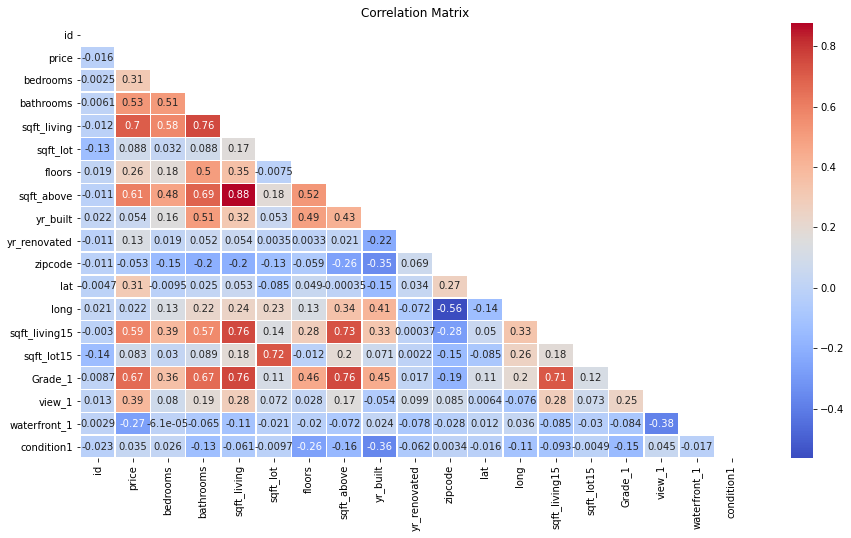

In [19]:
# using heatmap to visualize the correlation
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask = matrix)
plt.title(f'Correlation Matrix')
plt.show()

### Correlation of our columns against the target("price)


In [20]:
def correlation(df):
    
    return data.corr()['price'].sort_values()
    
correlation(data)

waterfront_1    -0.265969
zipcode         -0.053166
id              -0.015796
long             0.022101
condition1       0.035290
yr_built         0.054459
sqft_lot15       0.083192
sqft_lot         0.087937
yr_renovated     0.128227
floors           0.256355
lat              0.306507
bedrooms         0.309204
view_1           0.394885
bathrooms        0.525889
sqft_living15    0.586415
sqft_above       0.605143
Grade_1          0.667738
sqft_living      0.702328
price            1.000000
Name: price, dtype: float64

## Analyzing price and location

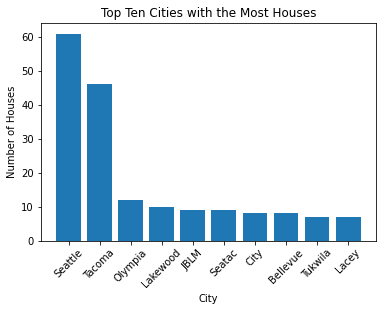

In [71]:
def create_bar_graph(data):
    # Count the occurrences of each city
    city_counts = data['City'].value_counts()

    # Select the top ten cities
    top_cities = city_counts.head(10)

    # Create a bar graph
    plt.bar(top_cities.index, top_cities.values)
    plt.xlabel('City')
    plt.ylabel('Number of Houses')
    plt.title('Top Ten Cities with the Most Houses')
    plt.xticks(rotation=45)
    plt.show()
    

# Example usage:
create_bar_graph(new_data)

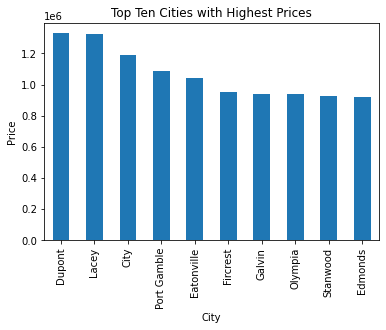

In [72]:
city_prices = new_data.groupby('City')['price'].mean()

# Select the top ten cities with the highest mean prices
top_ten_cities = city_prices.nlargest(10)

# Create a bar graph
top_ten_cities.plot(kind='bar', xlabel='City', ylabel='Price', title='Top Ten Cities with Highest Prices')

# Show the plot
plt.show()

## Analyzing seasonal trends in prices 

In [79]:
# Creating a function to map months to seasons
def get_season(date):
    if date.month in [3,4,5]:
        return 'Spring'
    elif date.month in [6,7,8]:
        return 'Summer'
    elif date.month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Winter'


In [82]:
# Applying the function to the 'date' column to create a 'season' column
data['season'] = data['date'].apply(get_season)
data[['date', 'season']]

,date,season
0,2014-10-13,Autumn
1,2014-12-09,Winter
2,2015-02-25,Winter
3,2014-12-09,Winter
4,2015-02-18,Winter
...,...,...
21592,2014-05-21,Spring
21593,2015-02-23,Winter
21594,2014-06-23,Summer
21595,2015-01-16,Winter


### Creating a boxplot of price segmented by season to view differences in price distribution by season.

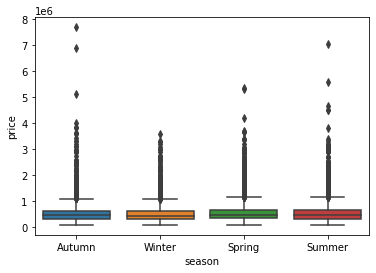

In [83]:
sns.boxplot(x='season', y='price', data=data);

### Making a timeseries plot of price over time, colored by season to see seasonal patterns.

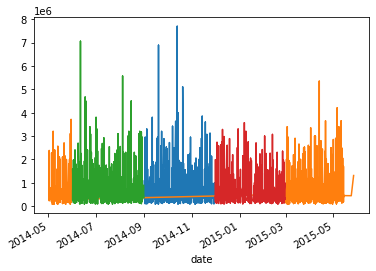

In [84]:
data.set_index('date').groupby('season')['price'].plot();

### Calculating summary statistics (mean, median, std dev) for price grouped by season to quantify differences.

In [86]:
data.groupby('season')['price'].agg([np.mean, np.median, np.std])

,mean,median,std
season,,,
Autumn,531276.474881,443725.0,378513.665722
Spring,552782.763271,465000.0,367075.050556
Summer,546719.464286,455000.0,368925.606702
Winter,519613.645467,430000.0,348171.543129


In [87]:
# Extract price by season into separate dataframes 
spring = data[data['season'] == 'Spring']['price']
summer = data[data['season'] == 'Summer']['price'] 
fall = data[data['season'] == 'Autumn']['price']
winter = data[data['season'] == 'Winter']['price']

# Perform ANOVA test
f_val, p_val = stats.f_oneway(spring, summer, fall, winter)  

print(f_val, p_val)

# Interpret results
alpha = 0.05
if p_val < alpha:
  print("We reject the null hypothesis")
  print("There is a statistically significant difference in price by season")  
else:
  print("We fail to reject the null hypothesis")
  print("There is no statistically significant difference in price by season")

8.082642416374668 2.2312373653979034e-05
We reject the null hypothesis
There is a statistically significant difference in price by season


In this case; these are the hypotheses.

Null hypothesis:

There is no difference in the mean price across the seasons. The season has no effect on price.

H0: μspring = μsummer = μfall = μwinter

Alternative hypothesis:

There is a difference in mean price for at least one season compared to the others. The season has an effect on price.

H1: At least one μ season ≠ μ other seasons

Where μseason is the population mean price for that season.

So in summary: Null hypothesis (H0): The seasons all have an equal effect on mean price (no difference). Alternative hypothesis (H1): At least two seasons have a statistically significant difference in their effect on mean price. If we reject H0 based on a small ANOVA p-value, we would conclude there is a significant difference in price by season. Failing to reject H0 means we cannot say there is a seasonal effect.

## Linear Regression
Since we now have a better understanding of the correlation between our target("price") and our features("independent variables"), we  proceed to building regression models to further understand the magnitude our features have on price and predict whether this model can give us accurate house prices when fitted with the said features. We will explore a few features from our data set which we have investigated and come to a conclusion that they have a significance on our target.Steps involved here are as follows;
1. Feature Selection
2. Model Selection
3. Model training
4. Model evaluation
5. Model interpretation
6. Model validation and testing
7. **feature engineering

## 1.Feature selection
Here we just choose the endogenous and exogenous variables. First we will select for the baseline model then after we shall select the rest of the features for our multiple linear regression model

In [22]:
y= data["price"]
X = data["sqft_living"]

# 2. Building a baseline model
Creating  a baseline model for our regression  model

#### Distribution of our target(price)

We shall visualize the price column in order to understand the distribution 

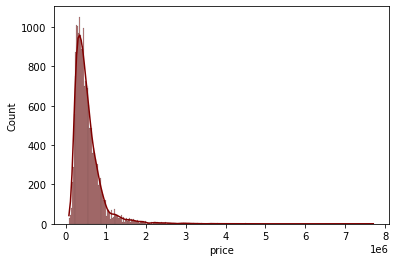

In [23]:
sns.histplot(data["price"], color="maroon", kde=True)
plt.show();

The distribution of our data seems to a have a longer right tail than the left tail. This indicates a positive skewness in our target meaning the mean is greater than the median.

### Splitting our data into train and test sets

First we split the data into test set and  training set. We will use the "train_test_split" function  from scikit-learn library to split our data. 

In [24]:
#importing scikit-learn library
from sklearn.model_selection import train_test_split

#splitting data into test and train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In the train_test_split function we have is used above, we have split 80% of the data into training set and 20% of the data into test set.

In the next cell we are going to build a baseline model using the y_train and x_train variables. To do that we import statsmodels library which is a powerful library for statistical modelling and is similar to the sci-kit learn module

In [25]:
#importing statsmodels
import statsmodels.api as sm

In [26]:
#function to create models and print the summary
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.655e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:44:37   Log-Likelihood:            -2.3497e+05
No. Observations:               16914   AIC:                         4.700e+05
Df Residuals:                   16912   BIC:                         4.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.448e+04   4960.688     -8.966      0.000   -5.42e+04   -3.48e+04
sqft_living   280.1781      2.178    128.639      0.000     275.909     284.447
==============================================================================
Omnibus:                    11863.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           453836.272
Skew:                           2.904   Prob(JB):                         0.00
Kurtosis:                      27.703   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

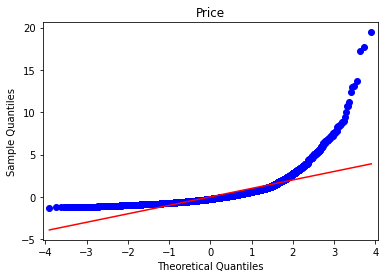

In [27]:
import scipy.stats as stats

# Generate a Q-Q plot
sm.qqplot(data["price"], line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Price')
plt.show()


Wonderful! We now have our baseline model and from it we can interpret its metrics
### Interpretation

Looking at the summary above, we can see that the regression line we found was

price = sqft_living285.8630 - 4.399e+04

The model is statistically significant overall, with an F-statistic p-value well below 0.05. 
The model explains about 50% of the variance in price. 
The model `const` and `sqft_living`  coefficients  are both statistically significant, with t-statistic p-values well below 0.05. 
If a house had 0 sqft of living , we would expect price to be about -43,990. 
For each increase of 1 sqft in the living , we see an associated increase in price of about 280.
 


We now have our baseline model which we created using the train sets obtained from splitting our data. To analyze our model further we will predict our target("price") using the trained model then compare metrics to determine if our model is efficient or we need to adjust it. We also check if our model is under fitted or over fitted.
To perform comparisson we will import another module from sci-kit learn 

In [28]:
#predicting the dependent varible
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

#importing functions from sci-kit learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#writing a function to calculate the metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_regression_metrics(y_test, y_pred):
    metrics = {}

    # Calculate Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_test, y_pred)

    # Calculate Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (coefficient of determination)
    metrics['R-squared'] = r2_score(y_test, y_pred)

    return metrics


In [29]:
metrics = calculate_regression_metrics(y_test, y_pred)
print(metrics)

{'MAE': 177033.87791345723, 'MSE': 70202650031.35713, 'R-squared': 0.48779757847019767}


### Comparison of our baseline model against the prediction model

## R-squared

Comparing the r-squared values from the test model  and and the prediction model we can note a difference. Our train model has a R-squared value of almost 50% while our test model has a value of almost 48%. This means our baseline model is good ...

## Residuals


Residuals are the difference between the true values and the values predicted by our model. We visualize to understand the distribution and also check if it meets the assumption of linearity; that is normal distribution

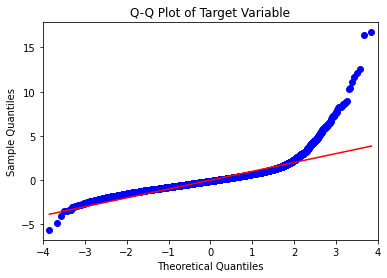

In [30]:
# Generate a Q-Q plot
sm.qqplot(results.resid, line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Q-Q Plot of Target Variable')
plt.show()


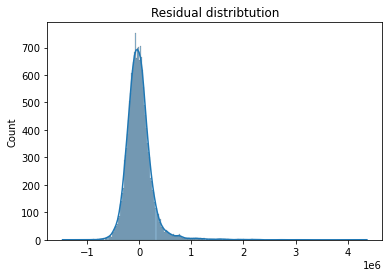

In [31]:
#ploting histogram to show residuals distribution
sns.histplot(results.resid, bins = "auto", kde = True)
plt.title("Residual distribtution")
plt.show();

From the above plot we can see that our baseline model residuals do not have a normal distribution. This violates one of the linearity assumptions of linear regression. Linear models make key assumptions one of which is that the errors or residuals follow a normal distribution. The normality assumption is essential for valid statistical inferences and hypothesis testing. Non-normal residuals can lead to biased parameter estimates, incorrect p-values, and unreliable confidence intervals.

## Target transformation

The non-normal distribution shown by the residuals can be accounted for by the skewness of our target. Transforming the target variable can be an effective approach to make the data more closely approximate a normal distribution. By transforming the target variable, you aim to reduce skewness and make the data more symmetric, thus bringing it closer to a normal distribution.
This, in turn, helps the residuals conform more closely to the normality assumption, which is crucial for the validity of the model. We shall log transform our target and see if our residuals will follow a normal distribution.

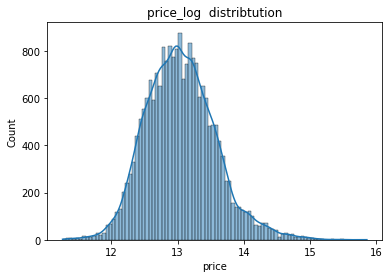

In [32]:
#importing numpy
import numpy as np
#log transforming the target
y_log = np.log(data["price"])
# visualizing to see its distribution
sns.histplot(y_log, bins = "auto", kde = True)
plt.title("price_log  distribtution")
plt.show();

Wonderful! Our target after transformation seems to follow an almost normal distribution. Next we create a model for the transformed target, then we shall visualize the residuals once again to see  their distribution. We will also check if it improves our model or not.

### Log transformed target model

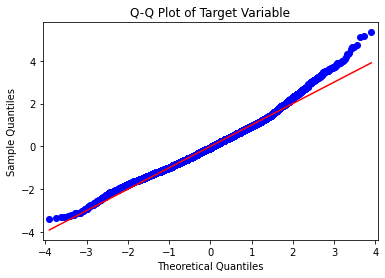

In [33]:
# Generate a Q-Q plot
sm.qqplot(y_log, line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Q-Q Plot of Target Variable')
plt.show()


In [34]:
#splitting data into test and train test
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=0)

##creating a model
log_model = sm.OLS(y_train, sm.add_constant(X_train))
log_results = log_model.fit()
log_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.586e+04
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:45:00   Log-Likelihood:                -7525.5
No. Observations:               16914   AIC:                         1.506e+04
Df Residuals:                   16912   BIC:                         1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2207      0.007   1704.768      0.000      12.207      12.235
sqft_living     0.0004   3.15e-06    125.933      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.650   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.629
Skew:                           0.035   Prob(JB):                        0.163
Kurtosis:                       3.015   Cond. No.                     5.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### prediction of our model

In [35]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

{'MAE': 536828.527684868,
 'MSE': 352139274884.2067,
 'R-squared': -1250053982156.927}

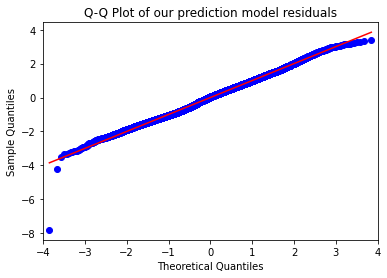

In [36]:



# Generate a Q-Q plot
sm.qqplot(log_results.resid, line='s', fit=True, dist=stats.norm, loc=0, scale=1)
plt.title('Q-Q Plot of our prediction model residuals')
plt.show()



## 2nd Model

selecting y and X variables

In [37]:
drop = data.drop(['id', 'price', 'date','sqft_lot','floors','sqft_basement',  'yr_renovated', 'zipcode',
'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis= 1)
X_sec = drop
y_sec= data["price"]
X_sec

,bedrooms,bathrooms,sqft_living,sqft_above,yr_built,Grade_1,view_1,waterfront_1,condition1
0,3,1.00,1180,1180,1955,7,0,1,2
1,3,2.25,2570,2170,1951,7,0,1,2
2,2,1.00,770,770,1933,6,0,1,2
3,4,3.00,1960,1050,1965,7,0,1,4
4,3,2.00,1680,1680,1987,8,0,1,2
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1530,2009,8,0,1,2
21593,4,2.50,2310,2310,2014,8,0,1,2
21594,2,0.75,1020,1020,2009,7,0,1,2
21595,3,2.50,1600,1600,2004,8,0,1,2


In [38]:
#importing StandardScaler from sci-kit learn
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X1_scaled = ss.fit_transform(X_sec)

splitting data into train and test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y_sec, test_size=0.2, random_state=0)


building multiple linear model

In [40]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3481.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:45:16   Log-Likelihood:            -2.3188e+05
No. Observations:               16914   AIC:                         4.638e+05
Df Residuals:                   16904   BIC:                         4.639e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.393e+05   1673.474    322.268      0.000    5.36e+05    5.43e+05
x1         -3.469e+04   2111.891    -16.428      0.000   -3.88e+04   -3.06e+04
x2          4.268e+04   2889.968     14.767      0.000     3.7e+04    4.83e+04
x3          1.476e+05   4505.256     32.765      0.000    1.39e+05    1.56e+05
x4          4653.5416   3826.021      1.216      0.224   -2845.858    1.22e+04
x5         -1.049e+05   2221.989    -47.216      0.000   -1.09e+05   -1.01e+05
x6          1.491e+05   2882.270     51.727      0.000    1.43e+05    1.55e+05
x7          3.188e+04   1950.901     16.339      0.000    2.81e+04    3.57e+04
x8         -5.399e+04   1872.819    -28.826      0.000   -5.77e+04   -5.03e+04
x9           1.13e+04   1812.824      6.231      0.000    7742.283    1.48e+04
==============================================================================
Omnibus:                    12604.697   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           826533.213
Skew:                           2.997   Prob(JB):                         0.00
Kurtosis:                      36.718   Cond. No.                         6.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

test

In [41]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)


{'MAE': 141592.73032447265,
 'MSE': 46826238256.493065,
 'R-squared': 0.6583531730583653}

metrics

In [42]:
metrics = calculate_regression_metrics(y_test, y_pred)
print(metrics)

{'MAE': 141592.73032447265, 'MSE': 46826238256.493065, 'R-squared': 0.6583531730583653}


In [43]:
#building the model
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3481.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:45:24   Log-Likelihood:            -2.3188e+05
No. Observations:               16914   AIC:                         4.638e+05
Df Residuals:                   16904   BIC:                         4.639e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.393e+05   1673.474    322.268      0.000    5.36e+05    5.43e+05
x1         -3.469e+04   2111.891    -16.428      0.000   -3.88e+04   -3.06e+04
x2          4.268e+04   2889.968     14.767      0.000     3.7e+04    4.83e+04
x3          1.476e+05   4505.256     32.765      0.000    1.39e+05    1.56e+05
x4          4653.5416   3826.021      1.216      0.224   -2845.858    1.22e+04
x5         -1.049e+05   2221.989    -47.216      0.000   -1.09e+05   -1.01e+05
x6          1.491e+05   2882.270     51.727      0.000    1.43e+05    1.55e+05
x7          3.188e+04   1950.901     16.339      0.000    2.81e+04    3.57e+04
x8         -5.399e+04   1872.819    -28.826      0.000   -5.77e+04   -5.03e+04
x9           1.13e+04   1812.824      6.231      0.000    7742.283    1.48e+04
==============================================================================
Omnibus:                    12604.697   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           826533.213
Skew:                           2.997   Prob(JB):                         0.00
Kurtosis:                      36.718   Cond. No.                         6.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y predict

In [44]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

{'MAE': 141592.73032447265,
 'MSE': 46826238256.493065,
 'R-squared': 0.6583531730583653}

In [45]:
correlation(X_sec).sort_values()

waterfront_1    -0.265969
zipcode         -0.053166
id              -0.015796
long             0.022101
condition1       0.035290
yr_built         0.054459
sqft_lot15       0.083192
sqft_lot         0.087937
yr_renovated     0.128227
floors           0.256355
lat              0.306507
bedrooms         0.309204
view_1           0.394885
bathrooms        0.525889
sqft_living15    0.586415
sqft_above       0.605143
Grade_1          0.667738
sqft_living      0.702328
price            1.000000
Name: price, dtype: float64

## 3. Polynomial  Transformation of  features

We will use polynomial transformation to see if our model will improve or not.

In [46]:
# Polynomial transforming
y_pol= data["price"]
X_pol = X_sec
X_pol

,bedrooms,bathrooms,sqft_living,sqft_above,yr_built,Grade_1,view_1,waterfront_1,condition1
0,3,1.00,1180,1180,1955,7,0,1,2
1,3,2.25,2570,2170,1951,7,0,1,2
2,2,1.00,770,770,1933,6,0,1,2
3,4,3.00,1960,1050,1965,7,0,1,4
4,3,2.00,1680,1680,1987,8,0,1,2
...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1530,2009,8,0,1,2
21593,4,2.50,2310,2310,2014,8,0,1,2
21594,2,0.75,1020,1020,2009,7,0,1,2
21595,3,2.50,1600,1600,2004,8,0,1,2


starndadizing our data

In [47]:
ss = StandardScaler()

X1_scaled = ss.fit_transform(X_pol)

splitting the data

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X1_scaled, y_sec, test_size=0.2, random_state=0)


Building the model

In [50]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

def build_polynomial_linear_model(X, y, degree=2):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Add a constant term (intercept)
    X_poly = (X_poly)

    # Build and fit a linear regression model using statsmodels
    model = sm.OLS(y, X_poly).fit()

    return model



# Build the polynomial linear model
model = build_polynomial_linear_model(X_train, y_train, degree=2)

# Print the summary of the model
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     815.8
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:46:05   Log-Likelihood:            -2.3000e+05
No. Observations:               16914   AIC:                         4.601e+05
Df Residuals:                   16860   BIC:                         4.605e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.334e+04   2241.953     -5.952      0.000   -1.77e+04   -8949.858
x2          2.851e+04   2972.717      9.591      0.000    2.27e+04    3.43e+04
x3          1.458e+05   5967.287     24.434      0.000    1.34e+05    1.57e+05
x4         -3.598e+04   4920.108     -7.312      0.000   -4.56e+04   -2.63e+04
x5         -7.013e+04   2713.742    -25.844      0.000   -7.55e+04   -6.48e+04
x6          1.373e+05   2775.927     49.475      0.000    1.32e+05    1.43e+05
x7          1.559e+04   5007.623      3.114      0.002    5778.958    2.54e+04
x8          5.948e+06   4.21e+04    141.228      0.000    5.87e+06    6.03e+06
x9          1.931e+04   2446.360      7.894      0.000    1.45e+04    2.41e+04
x10          638.3932    252.167      2.532      0.011     144.119    1132.668
x11         3431.9165   2932.150      1.170      0.242   -2315.405    9179.238
x12        -8264.1989   4494.629     -1.839      0.066   -1.71e+04     545.744
x13         6834.6904   4042.086      1.691      0.091   -1088.221    1.48e+04
x14        -3094.1989   2344.446     -1.320      0.187   -7689.558    1501.161
x15        -3005.7492   3100.612     -0.969      0.332   -9083.274    3071.775
x16          702.2192   2066.712      0.340      0.734   -3348.753    4753.192
x17        -2103.9682   1962.403     -1.072      0.284   -5950.483    1742.547
x18           -9.0281   2066.704     -0.004      0.997   -4059.984    4041.928
x19        -6142.8575   2645.867     -2.322      0.020   -1.13e+04    -956.682
x20         7820.0516   5934.096      1.318      0.188   -3811.398    1.95e+04
x21         3564.2530   5237.666      0.681      0.496   -6702.122    1.38e+04
x22         1.037e+04   3258.857      3.181      0.001    3979.567    1.68e+04
x23         1.484e+04   4213.910      3.521      0.000    6579.119    2.31e+04
x24         -591.2297   2533.067     -0.233      0.815   -5556.306    4373.847
x25        -9710.6946   2166.193     -4.483      0.000    -1.4e+04   -5464.729
x26          -90.7363   2778.952     -0.033      0.974   -5537.773    5356.300
x27        -6.847e+04   6956.386     -9.843      0.000   -8.21e+04   -5.48e+04
x28         1.324e+05   1.29e+04     10.263      0.000    1.07e+05    1.58e+05
x29        -3.224e+04   5390.309     -5.980      0.000   -4.28e+04   -2.17e+04
x30         6.559e+04   6218.224     10.548      0.000    5.34e+04    7.78e+04
x31        -9808.4678   3381.602     -2.901      0.004   -1.64e+04   -3180.173
x32        -1.649e+04   2407.166     -6.848      0.000   -2.12e+04   -1.18e+04
x33           1.2e+04   4252.296      2.821      0.005    3660.688    2.03e+04
x34        -6.102e+04   7239.149     -8.430      0.000   -7.52e+04   -4.68e+04
x35          988.7095   5056.387      0.196      0.845   -8922.338    1.09e+04
x36        -3.029e+04   5403.455     -5.606      0.000   -4.09e+04   -1.97e+04
x3

coefficients and p_values

In [51]:
model.params

x1    -1.334432e+04
x2     2.851020e+04
x3     1.458025e+05
x4    -3.597659e+04
x5    -7.013461e+04
x6     1.373397e+05
x7     1.559442e+04
x8     5.947704e+06
x9     1.931195e+04
x10    6.383932e+02
x11    3.431917e+03
x12   -8.264199e+03
x13    6.834690e+03
x14   -3.094199e+03
x15   -3.005749e+03
x16    7.022192e+02
x17   -2.103968e+03
x18   -9.028054e+00
x19   -6.142858e+03
x20    7.820052e+03
x21    3.564253e+03
x22    1.036727e+04
x23    1.483882e+04
x24   -5.912297e+02
x25   -9.710695e+03
x26   -9.073632e+01
x27   -6.847166e+04
x28    1.324299e+05
x29   -3.223643e+04
x30    6.558897e+04
x31   -9.808468e+03
x32   -1.648529e+04
x33    1.199563e+04
x34   -6.102379e+04
x35    9.887095e+02
x36   -3.029283e+04
x37   -1.111744e+04
x38   -9.445173e+03
x39   -1.072120e+03
x40    2.318242e+04
x41   -2.042966e+04
x42    3.191838e+03
x43   -7.074819e+03
x44   -4.555786e+03
x45    5.550368e+03
x46    1.620088e+04
x47    1.406000e+04
x48    7.713338e+03
x49    4.060273e+03
x50    4.985398e+03


In [52]:
model.pvalues

x1      2.699746e-09
x2      9.948197e-22
x3     1.335751e-129
x4      2.746822e-13
x5     1.813546e-144
x6      0.000000e+00
x7      1.847929e-03
x8      0.000000e+00
x9      3.101291e-15
x10     1.136250e-02
x11     2.418390e-01
x12     6.597936e-02
x13     9.087783e-02
x14     1.869198e-01
x15     3.323570e-01
x16     7.340295e-01
x17     2.836730e-01
x18     9.965146e-01
x19     2.026199e-02
x20     1.875829e-01
x21     4.961947e-01
x22     1.469021e-03
x23     4.304233e-04
x24     8.154500e-01
x25     7.414201e-06
x26     9.739531e-01
x27     8.466214e-23
x28     1.224674e-24
x29     2.270258e-09
x30     6.258948e-26
x31     3.730033e-03
x32     7.724659e-12
x33     4.793341e-03
x34     3.742282e-17
x35     8.449751e-01
x36     2.100622e-08
x37     3.286498e-04
x38     1.378315e-04
x39     7.787680e-01
x40     3.882083e-31
x41     5.707568e-10
x42     1.401206e-01
x43     3.704348e-03
x44     3.154532e-02
x45     3.988816e-02
x46     5.359265e-10
x47     1.371273e-11
x48     9.335

Prediction metrics

In [53]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)

calculate_regression_metrics(y_test, y_pred)

{'MAE': 141592.73032447265,
 'MSE': 46826238256.493065,
 'R-squared': 0.6583531730583653}

#### Summary on evaluation
The models that we have constructed has given us a more in depth understanding on the association of the various house features and the prices.
The model we finally came up with explains 72% proportion of the variance in the dependent variable (price) that is explained by the independent variables (features) in our regression model. 
Most of the households that would love to purchase houses in King County can now have a general idea of the criteria of house pricing. 

#### Conclusion.
The biggest contributors to pricing in a house is the square footage of the living space, square footage of the house excluding the basement and the grade of the house.

### LIMITATIONS
1. Our analysis relied on two data sets. More data would have given us a further analysis.

### NEXT STEPS

Incorporate more stakeholders like Architects
Explore more complex models in the near future  for better analysis and results